In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
N = 500
np.random.seed(1)

2021-07-16 00:29:43.709102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-16 00:29:43.709145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


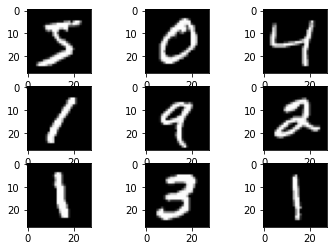

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
x = np.reshape(trainX, (-1, 28*28))
print(f"x shape: {x.shape}")
x = x[np.random.choice(x.shape[0], N)]
print(f"x shape (after sampling): {x.shape}")

x shape: (60000, 784)
x shape (after sampling): (500, 784)


In [4]:
u, s, vh = np.linalg.svd(x, full_matrices=False)
print(u.shape)
print(s.shape)
print(vh.shape)

(500, 500)
(500,)
(500, 784)


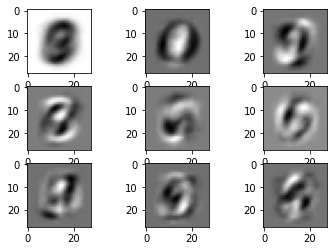

In [5]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(np.reshape(vh[i], (28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
n = 30
recon = u[:, :n] @ np.diag(s)[:n, :n] @ vh[:n]

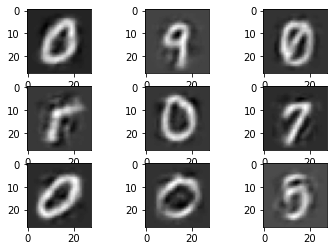

In [7]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(np.reshape(recon[i], (28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

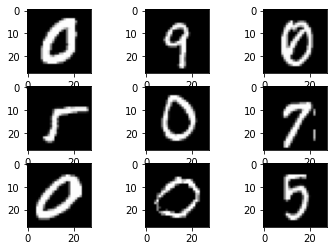

In [8]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(np.reshape(x[i], (28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
vh[:n].shape

(30, 784)

In [11]:
np.allclose(u@u.T, vh@vh.T)

True